<a href="https://colab.research.google.com/github/MrSaral/GSoC_QMLHEP_Exercise/blob/master/QuantumComputing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Hello, I am Saral Uttamani, CS Grad student at Stony Brook University. (Class of 2020) This is my submission for the Google Summer of Code QMLHEP coding exercise. There are two tasks, this is the Quantum computing exercise. I have tried to put comments and use variable names which are intiutive. If there are any questions, feel free to reach out on GitHub/LinkedIn.

In [1]:
pip install cirq

In [0]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

# Task 1

In [0]:
circuit = cirq.Circuit()

In [0]:
qubits= cirq.LineQubit.range(5)

In [0]:
for i in qubits:
  circuit.append(cirq.H(i))

In [0]:
circuit.append(cirq.CNOT(qubits[0],qubits[1]))
circuit.append(cirq.CNOT(qubits[1],qubits[2]))
circuit.append(cirq.CNOT(qubits[2],qubits[3]))
circuit.append(cirq.CNOT(qubits[3],qubits[4]))


In [0]:
circuit.append(cirq.SWAP(qubits[0],qubits[4]))

In [0]:
#The next task is to rotateX by pi/2, but since it is not mentioned on which
#qubit, I am gonna assume we have to apply it on all qubits.

for i in qubits:
  circuit.append(cirq.rx(np.pi/2).on(i))

In [38]:
print(circuit)

                                        ┌─────────┐
0: ───H───@──────────────────────────────×────────────Rx(0.5π)───
          │                              │
1: ───H───X───@───Rx(0.5π)───────────────┼───────────────────────
              │                          │
2: ───H───────X───@──────────Rx(0.5π)────┼───────────────────────
                  │                      │
3: ───H───────────X──────────@───────────┼Rx(0.5π)───────────────
                             │           │
4: ───H──────────────────────X───────────×────────────Rx(0.5π)───
                                        └─────────┘


# Task 2

In [0]:
def rotate(i=0,runs=10):
  circuit2 = cirq.Circuit()
  qubit=cirq.LineQubit.range(1)
  circuit2.append(cirq.rx(i).on(qubit[0]))
  circuit2.append(cirq.measure(qubit[0]))
  sim = cirq.Simulator()
  results=sim.run(circuit2, repetitions=runs)
  print ('For i= %.2f'%i)
  print (circuit2)
  count=0
  for k in np.array(results.data):
    if(k==0):
      count+=1

  p=count/runs
  print('Probability of |0> state =',p)
  print('=============End of Iterations=============')
  return p

In [133]:
prob=[]
for i in np.arange(0, 9, 0.1):
  prob.append(rotate(i,1000))

For i= 0.00
0: ───Rx(0.0π)───M───
Probability of |0> state = 1.0
=============End of Iterations=============
For i= 0.10
0: ───Rx(0.032π)───M───
Probability of |0> state = 0.996
=============End of Iterations=============
For i= 0.20
0: ───Rx(0.064π)───M───
Probability of |0> state = 0.994
=============End of Iterations=============
For i= 0.30
0: ───Rx(0.095π)───M───
Probability of |0> state = 0.977
=============End of Iterations=============
For i= 0.40
0: ───Rx(0.127π)───M───
Probability of |0> state = 0.967
=============End of Iterations=============
For i= 0.50
0: ───Rx(0.159π)───M───
Probability of |0> state = 0.935
=============End of Iterations=============
For i= 0.60
0: ───Rx(0.191π)───M───
Probability of |0> state = 0.916
=============End of Iterations=============
For i= 0.70
0: ───Rx(0.223π)───M───
Probability of |0> state = 0.874
=============End of Iterations=============
For i= 0.80
0: ───Rx(0.255π)───M───
Probability of |0> state = 0.869
=============End of Iterations=

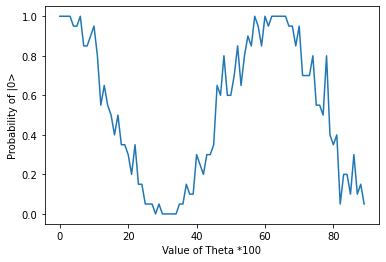

In [132]:
#For 20 iterations
plt.plot(prob)
plt.xlabel('Value of Theta *100')
plt.ylabel('Probability of |0>')
plt.show() 

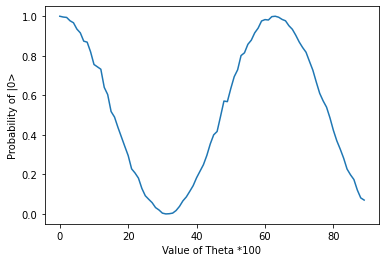

In [134]:
#For 1000 iterations
plt.plot(prob)
plt.xlabel('Value of Theta *100')
plt.ylabel('Probability of |0>')
plt.show() 

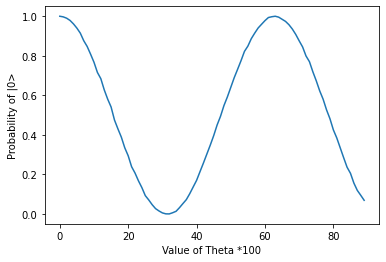

In [130]:
#For 8124 iterations
plt.plot(prob)
plt.xlabel('Value of Theta *100')
plt.ylabel('Probability of |0>')
plt.show() 

# Conclusion

I performed the circuit drawing task 1 and task 2 to plot the probability of |0> state as value of Rx rotation is increased by 0.1.

This was as per my interpretation of the question. I hope this analysis helps, please feel free to contact me for any questions/concerns.